In [16]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from shapely.wkt import loads 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# MGRS/UTM Grid
`civicknowledge.com-mgrs-1.1.1` Last Update: 2021-02-09T18:58:00

_Military Grid Reference System grid polygons_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)


## References
<ul><li> <strong>utm_grid_source</string>, <em>data/utm-grid.csv</em>. </li><li> <strong>geohash_pkg</string>, <em>metapack+http://library.metatab.org/civicknowledge.com-geohash-us.csv</em>. </li><li> <strong>us_states</string>, <em>censusgeo://2019/5/US/state</em>. </li><ul>

In [55]:
s = pkg.reference('utm_grid_source').dataframe()
s.columns = ['geometry','fid','zone','row','west_value','cm_value','east_value']
s['geometry'] = s.geometry.apply(loads)
s = s[s.west_value != 'NoZN']
s = gpd.GeoDataFrame(s, geometry='geometry', crs=4326)
s['zone_r'] = s.apply(lambda r: f"{r.zone:02d}{r.row}", axis=1)
s = s.drop(columns=['fid']).sort_values('zone_r')
s.head()

,geometry,zone,row,west_value,cm_value,east_value,zone_r
1085,"MULTIPOLYGON (((-179.99999 -72.00000, -179.000...",1,C,180W,177W,174W,01C
1158,"MULTIPOLYGON (((-179.99999 -64.00000, -179.000...",1,D,180W,177W,174W,01D
1032,"MULTIPOLYGON (((-179.99999 -56.00000, -179.000...",1,E,180W,177W,174W,01E
789,"MULTIPOLYGON (((-179.99999 -48.00000, -179.000...",1,F,180W,177W,174W,01F
999,"MULTIPOLYGON (((-179.99999 -40.00000, -179.000...",1,G,180W,177W,174W,01G


<AxesSubplot:>

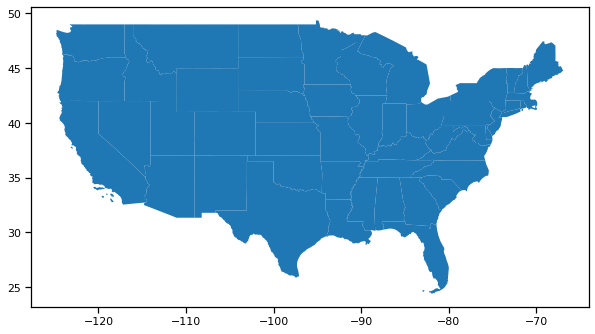

In [6]:
states = pkg.reference('us_states').geoframe().to_crs(4326)
continental_states = states[~states.stusps.isin(['HI','AK','PR','VI','MP','GU','AS'])]
continental_states.plot(figsize=(10,10))
us_boundary = continental_states.unary_union

In [57]:
t = gpd.sjoin(s, states )
state_zones = t[['zone_r', 'stusps']].drop_duplicates().zone_r

t = gpd.sjoin(s, continental_states )
cstate_zones = t[['zone_r', 'stusps']].drop_duplicates().zone_r

s['us_state'] = (s.zone_r.isin(state_zones)).astype(int)
s['cus_state'] = (s.zone_r.isin(cstate_zones)).astype(int)

<AxesSubplot:>

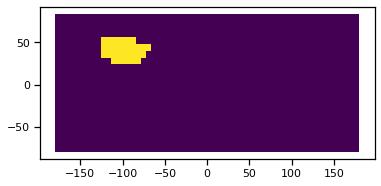

In [60]:

s.plot(column='cus_state')